## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract

In [1]:
import numpy as np
import pandas as pd
import os
import utils.common_data_needs as cdn
from utils.utils import *

/home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/munch/__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:533: UserWarning: Path '/home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-07-30T13;55;11.798909' not found. It will not be created.
  warnings.warn(msg)
/home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/core/model_attributes.py:6824: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dicti

[juliapkg] Found dependencies: /home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/julia/pyjuliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.11.5
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.6 to /home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/julia/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[j

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Compat ───────── v4.18.0
   Installed micromamba_jll ─ v1.5.12+0
    Updating `~/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/julia/Project.toml`
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [a93c6f00] + DataFrames v1.7.0
  [60bf3e95] + GLPK v1.2.1
  [87dc4568] + HiGHS v1.19.0
  [b6b21f68] + Ipopt v1.10.6
  [4076af6c] + JuMP v1.27.0
  [a3c327a0] + NemoMod v2.0.0 `https://github.com/sei-international/NemoMod.jl.git#61e63e0`
⌅ [6099a3de] + PythonCall v0.9.22
  [0aa819cd] + SQLite v1.6.1
    Updating `~/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/julia/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [523fee87] + CodecBzip2 v0.8.5
  [944b1d66] + CodecZlib v0.7.8
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.18.0
  [992eb4ea] + CondaPkg v0.2.29
  [883

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   5226.5 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
/home/tony-ubuntu/anaconda3/envs/ssp_uganda_env/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2575: UserWarning: Warning passed from optional_log: Successfully initialized JuMP optimizer from solver module HiGHS..
  warnings.warn(f"Warning passed from optional_log: {msg}.")


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [5]:
ssp_inputs = cdn._build_from_outputs(
    merge_type="inner",
    years_required=(2015, 2030)
)
ssp_inputs.head()

/home/tony-ubuntu/decision_sciences/ssp_uganda_data/data_processing/utils/common_data_needs.py:223: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate()


,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,yf_agrc_vegetables_and_vines_tonne_ha,...,frac_scoe_heat_energy_commercial_municipal_gasoline,frac_scoe_heat_energy_commercial_municipal_hydrocarbon_gas_liquids,frac_scoe_heat_energy_commercial_municipal_electricity,frac_scoe_heat_energy_commercial_municipal_solid_biomass,frac_scoe_heat_energy_commercial_municipal_coal,frac_scoe_heat_energy_commercial_municipal_natural_gas,frac_scoe_heat_energy_commercial_municipal_hydrogen,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,time_period
0,0.030468,1.805033,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.002223,...,0.0,0.0,0.012346,0.987654,0.0,0.0,0.0,2245.495980,43.393178,0
1,0.030468,1.832342,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.070985,...,0.0,0.0,0.012346,0.987654,0.0,0.0,0.0,2352.897913,45.468671,1
2,0.030468,1.827437,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.007029,...,0.0,0.0,0.012346,0.987654,0.0,0.0,0.0,2426.772259,46.896259,2
3,0.030468,1.935353,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.014348,...,0.0,0.0,0.012346,0.987654,0.0,0.0,0.0,2579.635329,49.850267,3
4,0.030468,2.003586,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,4.035314,...,0.0,0.0,0.012346,0.987654,0.0,0.0,0.0,2745.852607,53.062340,4


In [6]:
ssp_outputs = cdn._SISEPUEDE_MODELS.model_socioeconomic(ssp_inputs)[0]
ssp_outputs.head()


,time_period,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,frac_scoe_heat_energy_commercial_municipal_solid_biomass,frac_scoe_heat_energy_commercial_municipal_coal,frac_scoe_heat_energy_commercial_municipal_natural_gas,frac_scoe_heat_energy_commercial_municipal_hydrogen,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,population_gnrl_total,gdp_per_capita_usd,occrate_gnrl_hhs,qty_gnrl_households
0,0,0.030468,1.805033,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,...,0.987654,0.0,0.0,0.0,2245.495980,43.393178,35337912.0,2236.408308,4.726405,7476700
1,1,0.030468,1.832342,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,...,0.987654,0.0,0.0,0.0,2352.897913,45.468671,36531526.0,2266.809221,4.719980,7739763
2,2,0.030468,1.827437,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,...,0.987654,0.0,0.0,0.0,2426.772259,46.896259,37829212.0,2257.778988,4.721860,8011506
3,3,0.030468,1.935353,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,...,0.987654,0.0,0.0,0.0,2579.635329,49.850267,39136507.0,2319.828900,4.708883,8311208
4,4,0.030468,2.003586,0.988021,0.969532,0.969532,0.988021,0.988021,0.015234,0.011979,...,0.987654,0.0,0.0,0.0,2745.852607,53.062340,40486514.0,2386.967670,4.695255,8622857


In [7]:
# add year column to ssp_outputs
ssp_outputs['year'] = ssp_outputs['time_period'] + 2015

# Filter to only year and qty_gnrl_households
ssp_outputs = ssp_outputs[['year', 'qty_gnrl_households']]
ssp_outputs.head()

,year,qty_gnrl_households
0,2015,7476700
1,2016,7739763
2,2017,8011506
3,2018,8311208
4,2019,8622857


In [8]:
# Raw inputs: ktoe = kilotonnes of oil equivalent

# 2023 values in ktoe
households_total_ktoe = 8031.38 
households_electricity_ktoe = 83.50
households_biofuels_ktoe = 7914.71
households_oil_ktoe = 33.17
base_year = 2023

In [9]:
households_biofuels_ktoe + households_electricity_ktoe + households_oil_ktoe == households_total_ktoe

True

In [10]:
# Convert ktoe to GJ
ktoe_to_gj = 41868 # 1 ktoe = 41868 GJ

# Assumption: Share by electricity use
frac_electricity_in_heat_energy = 0.2
frac_electricity_in_elec_appliances = 1.0 - frac_electricity_in_heat_energy

base_year_households = ssp_outputs.loc[ssp_outputs['year'] == base_year, 'qty_gnrl_households'].values[0]

consumpinit_scoe_gj_elec_appliances = households_electricity_ktoe * ktoe_to_gj * frac_electricity_in_elec_appliances
consumpinit_scoe_gj_heat_energy = (households_oil_ktoe + households_biofuels_ktoe + (households_electricity_ktoe * frac_electricity_in_heat_energy)) * ktoe_to_gj


# Mapping
sector_mapping = {
    "consumpinit_scoe_gj_per_hh_residential_elec_appliances": consumpinit_scoe_gj_elec_appliances / base_year_households,
    "consumpinit_scoe_gj_per_hh_residential_heat_energy": consumpinit_scoe_gj_heat_energy / base_year_households
}


In [11]:
# Set household scaling factor
household_scaling = ssp_outputs.loc[ssp_outputs['year'] == base_year, 'qty_gnrl_households'].values[0]
household_scaling

np.int64(9798698)

In [12]:
# Filter the ssp_outputs to only include <= base_year
ssp_outputs = ssp_outputs[ssp_outputs['year'] <= base_year].reset_index(drop=True)
ssp_outputs

,year,qty_gnrl_households
0,2015,7476700
1,2016,7739763
2,2017,8011506
3,2018,8311208
4,2019,8622857
5,2020,8911340
6,2021,9205135
7,2022,9500288
8,2023,9798698


In [13]:
# Scale by household
for col, value in sector_mapping.items():
    ssp_outputs[col] = (value * (ssp_outputs['qty_gnrl_households'] / household_scaling))

In [14]:
# Drop gdp_mmm_usd as it's no longer needed
consumpinit_scoe = ssp_outputs.drop(columns=['qty_gnrl_households'])
consumpinit_scoe.head()

,year,consumpinit_scoe_gj_per_hh_residential_elec_appliances,consumpinit_scoe_gj_per_hh_residential_heat_energy
0,2015,0.217787,25.966792
1,2016,0.225450,26.880418
2,2017,0.233365,27.824189
3,2018,0.242095,28.865062
4,2019,0.251173,29.947428


In [15]:
# project to 2100
consumpinit_scoe = gu.extend_projection(consumpinit_scoe, base_year + 1, 2100)
consumpinit_scoe

,year,consumpinit_scoe_gj_per_hh_residential_elec_appliances,consumpinit_scoe_gj_per_hh_residential_heat_energy
0,2015,0.217787,25.966792
1,2016,0.225450,26.880418
2,2017,0.233365,27.824189
3,2018,0.242095,28.865062
4,2019,0.251173,29.947428
...,...,...,...
81,2096,0.285424,34.031158
82,2097,0.285424,34.031158
83,2098,0.285424,34.031158
84,2099,0.285424,34.031158


## Validation

In [16]:
# check for duplicates
gu.check_duplicates(consumpinit_scoe)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [17]:
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparing consumpinit_scoe_gj_per_hh_residential_elec_appliances...


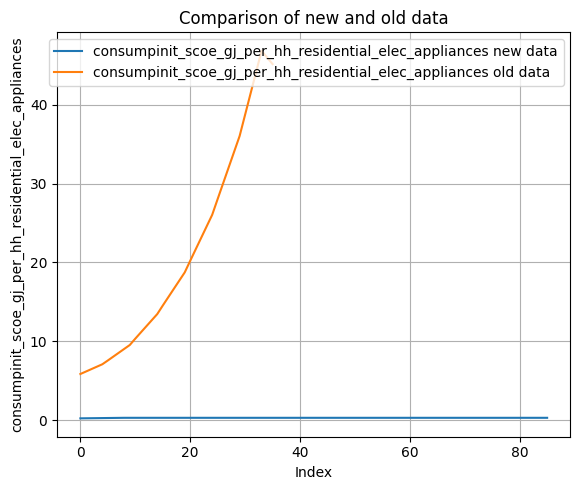

Comparing consumpinit_scoe_gj_per_hh_residential_heat_energy...


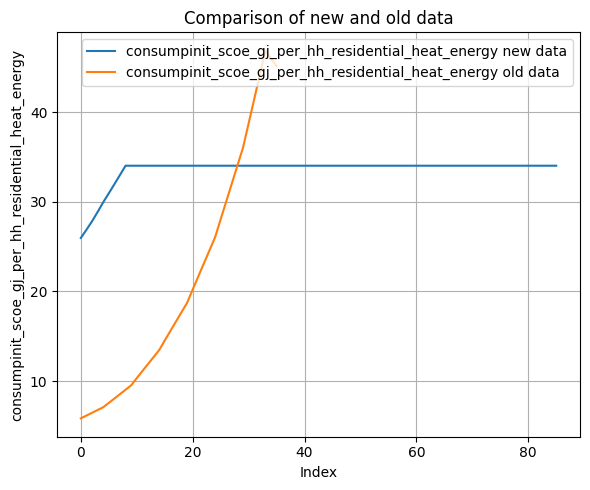

In [18]:
for var in consumpinit_scoe.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(consumpinit_scoe, uga_global_df, [var])

## Save

In [19]:
consumpinit_scoe.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "consumpinit_scoe_gj_per_hh.csv"), index=False)